In [1]:
#plantilla

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
datos=np.loadtxt('/Users/usuario-mac/Desktop/CLASES/2021-2/Logica/Codigos_Clase/Analisis_Datos/datosIMC.txt')

#print(datos)

In [95]:
#acceder a las columnas de datos


peso=datos[:,0]
altura=datos[:,1]
genero=np.int_(datos[:,2])
edad=np.int_(datos[:,3])
ID=np.arange(0,len(peso))

print(len(genero))
print(np.min(peso),np.max(peso),np.std(peso),np.mean(peso))
print(np.min(altura),np.max(altura))

185
13.0 106.0 15.92112897979394 60.609189189189195
1.09 103.0


Text(0.5, 0, 'peso (kg)')

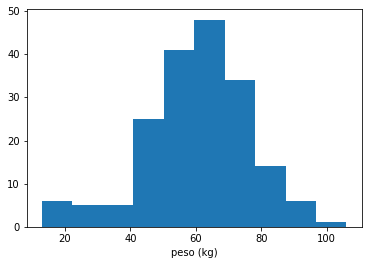

In [5]:
plt.hist(peso)
plt.xlabel('peso (kg)')

Text(0.5, 0, 'Edad (años)')

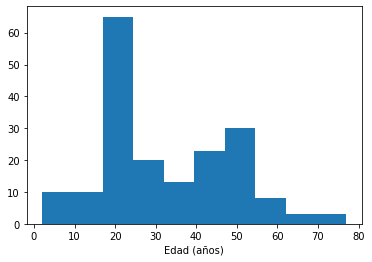

In [6]:
plt.hist(edad)
plt.xlabel('Edad (años)')

In [7]:
#discriminar mis datos por genero: mujeres=0, hombres=1
mujeres0=genero==0
hombre0=genero==1

mujeres=genero[mujeres0]
hombres=genero[hombre0]


print(len(mujeres))
print(len(hombres))

111
74


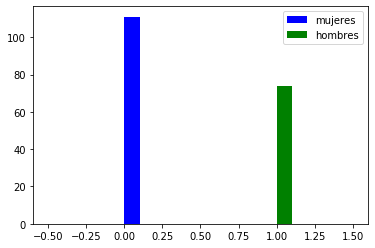

In [8]:
plt.hist(mujeres,label='mujeres',color='b')
plt.hist(hombres,label='hombres',color='g')
plt.legend()
plt.savefig('./figura_genero.png')

In [12]:
#clasificar niños de adultos ya que el IMC para niños-adolecentes es diferente al de los adultos
#niños-adolecentes=2-19 años

ninos0=edad<=19
adultos0=edad>19

ninos=edad[ninos0]
adultos=edad[adultos0]

print(len(ninos))

56


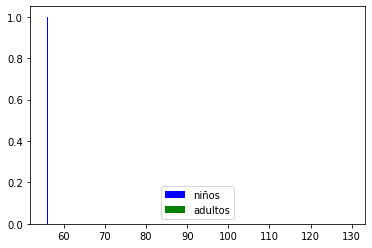

In [10]:
plt.hist(len(ninos),label='niños',color='b')
plt.hist(len(adultos),label='adultos',color='g')
plt.legend()

In [13]:
ninas0=(edad<=19) & (genero==0)
ninas=ninas0[ninas0]

ninos0=(edad<=19) & (genero==1)
ninosH=ninos0[ninos0]

print(len(ninas),len(ninosH))

38 18


In [16]:
mujerA0=(edad>19) & (genero==0)
mujerA=mujerA0[mujerA0]

hombreA0=(edad>19) & (genero==1)
hombreA=hombreA0[hombreA0]

print(len(mujerA),len(hombreA))

73 56


Text(0.5, 1.0, 'Histograma por edad y genero')

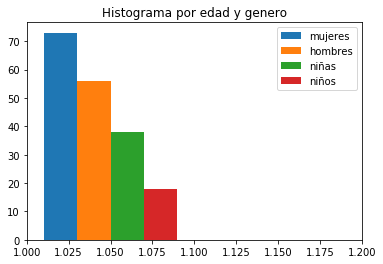

In [20]:
plt.hist([mujerA,hombreA,ninas,ninosH],label= ['mujeres','hombres','niñas','niños'])
plt.legend()
plt.xlim(1.0,1.2)
plt.title('Histograma por edad y genero')

In [37]:
#IMC para mujeres y hombres (adultos)
# hombre adulto: hombreA0
#mujer adulta: mujerA0

#1. Hombres, IMC=peso/altura^2

IDH=ID[hombreA0]
pesoH=peso[hombreA0]
alturaH=altura[hombreA0]
edadH=edad[hombreA0]


#print(pesoH)
#print(alturaH)
#print(edadH)
#print(IDH)


IMCH=pesoH/(alturaH)**2

#print(IMCH)
print(np.mean(edadH),np.std(edadH))
print(np.min(edadH),np.max(edadH))
print(np.mean(pesoH),np.std(pesoH))
print(np.mean(alturaH),np.std(alturaH))
print(np.mean(IMCH),np.std(IMCH))

36.535714285714285 12.317183533749981
20 71
72.92857142857143 10.404080832018929
1.7108928571428572 0.06339436617922219
24.944492004346444 3.6040181343323368


In [49]:
#Clasificacion del IMC para hombres

#Desnutricion

desnutricionH= (IMCH<20)
print(len(IMCH[desnutricionH]), IDH[desnutricionH])
print('ojo, adulto en desnutrición', len(IMCH[desnutricionH]),edadH[desnutricionH])

#Normal
normalH= (IMCH>=20) & (IMCH<=24.9)
print(len(IMCH[normalH]))
print('Felicitaciones, buenos habitos de nutricion', len(IMCH[normalH]))

#Sobre Peso
sobreP=(IMCH>=25) & (IMCH<=29.9)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCH[sobreP]))

#obesidad
obesidad=(IMCH>=30) & (IMCH<=40)
print('ojo, Obesidad', len(IMCH[obesidad]),IMCH[obesidad])

#Obesidad Grave
obesidad_G=(IMCH>40)
print('ojo, Obesidad Grave', len(IMCH[obesidad_G]),)

3 [ 48 123 174]
ojo, adulto en desnutrición 3 [23 23 21]
26
Felicitaciones, buenos habitos de nutricion 26
ojo, sobre peso detectado, hay que cuidarse 22
ojo, Obesidad 3 [39.41106484 32.52595156 32.32323232]
ojo, Obesidad Grave 0


Text(0, 0.5, 'IMC Hombres Adultos')

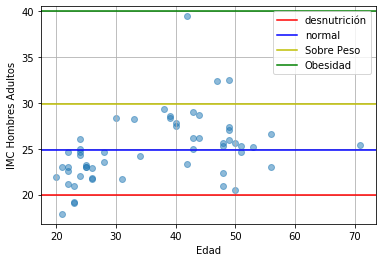

In [68]:
#graifica IMC para hombres
plt.scatter(edadH,IMCH,marker='o',alpha=0.5)
plt.grid()
plt.axhline(y=20,color='r',linestyle='-',label='desnutrición')
plt.axhline(y=24.9,color='b', linestyle='-',label='normal')
plt.axhline(y=29.9,color='y', linestyle='-',label='Sobre Peso')
plt.axhline(y=40,color='g', linestyle='-',label='Obesidad')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('IMC Hombres Adultos')

In [73]:
#Clasificacion del IMC para mujeres
#mujer adulta: mujerA0

pesoM=peso[mujerA0]
alturaM=altura[mujerA0]
edadM=edad[mujerA0]
IDM=ID[mujerA0]

IMCM=pesoM/(alturaM)**2

#print(IDM)
#print(pesoM)

print(np.mean(edadM),np.std(edadM))
print(np.min(edadM),np.max(edadM))
print(np.mean(pesoM),np.std(pesoM))
print(np.mean(alturaM),np.std(alturaM))
print(np.mean(IMCM),np.std(IMCM))

40.43835616438356 14.28380278340956
20 77
59.92739726027397 9.495857211681841
1.5857534246575342 0.06529003381580514
23.81482742782564 3.429186132868591


In [80]:
#IMC Mujeres

#Desnutricion

desnutricionM= (IMCM<19)
print(len(IMCM[desnutricionM]))
print(edadM[desnutricionM])
print('ojo, adulto Mujer en desnutrición', len(IMCM[desnutricionM]),edadM[desnutricionM])

#Normal
normalM= (IMCM>=19) & (IMCM<=23.9)
print('Felicitaciones, buenos habitos de nutricion', len(IMCM[normalM]))

#sobre peso
sobreP_M=(IMCM>=24) & (IMCM<=27)
print('ojo, sobre peso detectado, hay que cuidarse', len(IMCM[sobreP_M]))

#obesidad
obesidadM=(IMCM>=27) & (IMCM<=32)
print('ojo, Obesidad', len(IMCM[obesidadM]))

#obesidad Grave
obesidad_GM=(IMCM>32)
print('ojo, Obesidad Grave', len(IMCM[obesidad_GM]))

5
[21 75 24 20 20]
ojo, adulto Mujer en desnutrición 5 [21 75 24 20 20]
Felicitaciones, buenos habitos de nutricion 37
ojo, sobre peso detectado, hay que cuidarse 18
ojo, Obesidad 10
ojo, Obesidad Grave 3


Text(0, 0.5, 'IMC Mujeres Adultas')

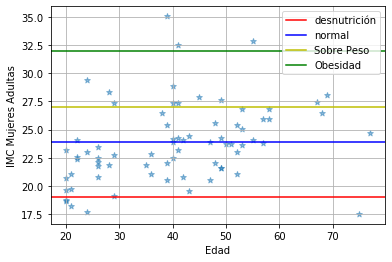

In [84]:
#graifica IMC para Mujeres
plt.scatter(edadM,IMCM,marker='*',alpha=0.5)
plt.grid()
plt.axhline(y=19,color='r',linestyle='-',label='desnutrición')
plt.axhline(y=23.9,color='b', linestyle='-',label='normal')
plt.axhline(y=27,color='y', linestyle='-',label='Sobre Peso')
plt.axhline(y=32,color='g', linestyle='-',label='Obesidad')
plt.legend()
plt.xlabel('Edad')
plt.ylabel('IMC Mujeres Adultas')

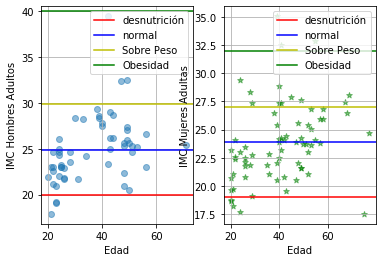

In [92]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(edadH,IMCH,marker='o',alpha=0.5)
ax1.grid()
ax1.axhline(y=20,color='r',linestyle='-',label='desnutrición')
ax1.axhline(y=24.9,color='b', linestyle='-',label='normal')
ax1.axhline(y=29.9,color='y', linestyle='-',label='Sobre Peso')
ax1.axhline(y=40,color='g', linestyle='-',label='Obesidad')
ax1.legend()
ax1.set_xlabel('Edad')
ax1.set_ylabel('IMC Hombres Adultos')




ax2.scatter(edadM,IMCM,marker='*',alpha=0.5,c='g')
ax2.grid()
ax2.axhline(y=19,color='r',linestyle='-',label='desnutrición')
ax2.axhline(y=23.9,color='b', linestyle='-',label='normal')
ax2.axhline(y=27,color='y', linestyle='-',label='Sobre Peso')
ax2.axhline(y=32,color='g', linestyle='-',label='Obesidad')
ax2.legend()
ax2.set_xlabel('Edad')
ax2.set_ylabel('IMC Mujeres Adultas')

plt.savefig('./newfig.pdf')